# 准备

In [1]:
%matplotlib inline
import pybullet as p
import pybullet_data
import math
import time
import  matplotlib.pyplot as plt
import numpy as np

In [2]:
physicsClient = p.connect(p.GUI)#or p.DIRECT for non-graphical version
p.setAdditionalSearchPath(pybullet_data.getDataPath()) #used by loadURDF

In [3]:
p.setGravity(0,0,-9.8)
planeId = p.loadURDF("plane.urdf")

# 导入机器人

[nachi.urdf](https://github.com/houliwei/PhD/blob/master/nachi/nachi.urdf)

In [4]:
cubeStartPos = [0,0,0]
cubeStartOrientation = p.getQuaternionFromEuler([3*math.pi/2,0,0])
boxId = p.loadURDF("nachi/nachi.urdf",cubeStartPos, cubeStartOrientation,useFixedBase=True)
#关节数
print(p.getNumJoints(boxId))
print(boxId)
# 查看关节信息
for i in range(6):
    print(p.getJointInfo(boxId,i))

6
1
(0, b'J1', 0, 7, 6, 1, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, b'Link1', (0.0, 0.0, 1.0), (0.04471199959516525, -0.05182100087404251, 3.1194998882710934e-05), (-0.7071026262591633, -0.0027723413906732925, 0.00277235142653978, 0.7071000665593062), -1)
(1, b'J2', 0, 8, 7, 1, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, b'Link2', (0.0, 1.0, 0.0), (0.019703999161720276, -0.0008962799911387265, 0.08334000408649445), (0.0, 0.0, -4.163349908106383e-17, 1.0), 0)
(2, b'J3', 0, 9, 8, 1, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, b'Link3', (0.0, 1.0, 0.0), (0.022938000038266182, 0.0007837699959054589, 0.13047999143600464), (-6.1384472228373e-11, 0.0034577931290741657, -1.7752393786815822e-08, 0.9999940218154688), 1)
(3, b'J4', 0, 10, 9, 1, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, b'Link4', (1.0, 0.0, 0.0), (0.0795740607281914, 0.00023600000713486224, 0.01943100057542324), (0.009682348513957493, -4.214450431999829e-18, -3.2618609447958486e-16, 0.9999531249649927), 2)
(4, b'J5', 0, 11, 10, 1, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, b'Link5', (0.0,

# 仿真Ⅰ:自由空间运动

In [5]:
'''
两种仿真模式
（1）p.stepSimulation() #perform all the actions in a single forward dynamics simulation step such as collision detection, constraint solving and integration.
（2）p.setRealTimeSimulation(1)
'''


 #Joint damping coefficents. 
jd=[0.5,0.5,0.5,0.5,0.5,0.5,0.5]  #Using large values for the joints that we don't want to move. eg：jd=[100.0,100.0,100.0,100.0,100.0,100.0,0.5]
# 初始位姿
pos = [0.1,0,0.6]
orn = p.getQuaternionFromEuler([3.14,0,0])
J5P = 0
#安装力传感器
p.enableJointForceTorqueSensor(boxId,5)
# x方向力的记录
Fx1 = []
# 仿真
for i in range(501):
    p.stepSimulation()
    #for i in range (1):
    pos[0] += 0.001
    jointPoses = p.calculateInverseKinematics(boxId,5,pos,orn,jointDamping=jd)
    p.setJointMotorControlArray(boxId,[0,1,2,3,4,5],controlMode=p.POSITION_CONTROL,targetPositions=jointPoses,
                                targetVelocities=[0,0,0,0,0,0],forces=[500,500,500,500,500,500],
                               positionGains=[0.03,0.03,0.03,0.03,0.03,0.03],
                               velocityGains=[1,1,1,1,1,1])
    J5EndState=p.getJointState(boxId,jointIndex=5)    # output: (1)jointPosition ; (2)jointVelocity ; (3)jointReactionForces (4)appliedJointMotorTorque
    Fx1.append(J5EndState[2][0])     #get F in x-axis
    time.sleep(0.03)
#print(p.getContactPoints())   

()


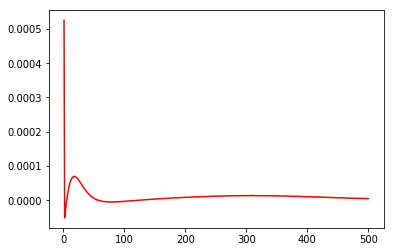

In [6]:
# 作图
x1 = np.linspace(1, 500,500)
y1 = Fx1[1:]
plt.plot(x1, y1, 'r-')
plt.show()
# 关闭仿真器
p.disconnect()

# 仿真2：约束空间运动

In [1]:
%matplotlib inline
import pybullet as p
import pybullet_data
import math
import time
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 准备
physicsClient = p.connect(p.GUI)#or p.DIRECT for non-graphical version

In [3]:
p.setAdditionalSearchPath(pybullet_data.getDataPath()) #used by loadURDF
p.setGravity(0,0,-9.8)
planeId = p.loadURDF("plane.urdf")

In [4]:
#导入机器人
cubeStartPos1 = [0,0,0]
cubeStartOrientation1 = p.getQuaternionFromEuler([3*math.pi/2,0,0])
boxId = p.loadURDF("nachi/nachi.urdf",cubeStartPos1, cubeStartOrientation1,useFixedBase=True)

for i in range(1):
    p.stepSimulation()
InitialJointState = p.getJointState(boxId,jointIndex=5)  #（1）jointPosition （2）jointVelocity （3）jointReactionForces （4）appliedJointMotorTorque


In [5]:
#导入障碍物
cubeStartPos2 = [0.5,0,0]
#cubeStartOrientation2 = p.getQuaternionFromEuler([3*math.pi/2,0,math.pi])
cubeStartOrientation2 = p.getQuaternionFromEuler([3*math.pi/2,0,0])
boxId2 = p.loadURDF("nachi/nachi.urdf",cubeStartPos2, cubeStartOrientation2,useFixedBase=False)

In [7]:

#Joint damping coefficents. 
jd=[0.5,0.5,0.5,0.5,0.5,0.5,0.5]  #Using large values for the joints that we don't want to move. eg：jd=[100.0,100.0,100.0,100.0,100.0,100.0,0.5]

# 初始位姿
#pos = [0.1,0,0.5]
InitialLinkState = p.getLinkState(boxId,5) 
InitialLinkState = list(InitialLinkState)     # 元组转列表
InitialLinkState[0] = list(InitialLinkState[0])   # 元组转列表
#orn = p.getQuaternionFromEuler([3.14,0,0])
orn = (0.0002783781085675267, 0.043552660059200485, -0.004722025404943391, 0.9990399345288813)
#安装力传感器
p.enableJointForceTorqueSensor(boxId,5)
# x方向力的记录
Fx1 = []
# 仿真
while InitialLinkState[0][0] <= 1:
    p.stepSimulation()
    if InitialLinkState[0][2] >= 0.5:
        InitialLinkState[0][2] -= 0.01
    else:
        InitialLinkState[0][0] += 0.01
    jointPoses = p.calculateInverseKinematics(boxId,5,InitialLinkState[0],orn,jointDamping=jd)
    p.setJointMotorControlArray(boxId,[0,1,2,3,4,5],controlMode=p.POSITION_CONTROL, targetPositions=jointPoses,
                                targetVelocities=[0,0,0,0,0,0],forces=[500,500,500,500,500,500],
                               positionGains=[0.03,0.03,0.03,0.03,0.03,0.03],
                               velocityGains=[1,1,1,1,1,1])
    J5EndState=p.getJointState(boxId,jointIndex=5)    # output: (1)jointPosition ; (2)jointVelocity ; (3)jointReactionForces (4)appliedJointMotorTorque
    Fx1.append(J5EndState[2][0])     #get F in x-axis
    time.sleep(0.05)
for i in range(100):
    p.stepSimulation()
    pos = [0.1,0,0.6]
  #  FinishPose = p.calculateInverseKinematics(boxId,5,pos,orn,jointDamping=jd)      
    FinishPose = p.calculateInverseKinematics(boxId,5,pos,jointDamping=jd)  
    p.setJointMotorControlArray(boxId,[0,1,2,3,4,5],controlMode=p.POSITION_CONTROL, targetPositions = FinishPose,
                                targetVelocities=[0,0,0,0,0,0],forces=[500,500,500,500,500,500],
                               positionGains=[0.03,0.03,0.03,0.03,0.03,0.03],
                               velocityGains=[1,1,1,1,1,1])

    time.sleep(0.05)
#print(p.getContactPoints())   

((0, 0, 2, -1, -1, (0.5670919099354718, 0.019351276942744668, -2.237793284010081e-16), (0.5671318812091182, 0.019355148372780837, -8.486799168899717e-06), (7.812684663478194e-13, -4.691098603740255e-13, -1.0), -8.48679916870535e-06, 41.07342389770253, -0.3181596103633256, (0.0, 1.0, -4.691098603740255e-13), -14.612405047950196, (1.0, 3.665007411630546e-25, 7.812684663478194e-13)), (0, 0, 2, -1, -1, (0.5669234613544092, -0.020631654167606883, -6.678685382510707e-16), (0.5669234613544092, -0.020631654167606872, -1.090094604851155e-05), (-5.581537140743384e-13, 6.436210015419714e-13, -1.0), -1.0900946047843682e-05, 34.86142071124822, 0.8475027436859545, (0.0, 1.0, 6.436210015419714e-13), -1.5243973395214525, (1.0, 3.592394524668968e-25, -5.581537140743384e-13)), (0, 0, 2, -1, 5, (1.2459557664299015, -0.006637118015145992, -2.237793284010081e-16), (1.2459557664299015, -0.006637118015145986, -1.1025621710299138e-05), (-8.931019216685515e-13, 5.612412955016728e-13, -1.0), -1.1025621710075359

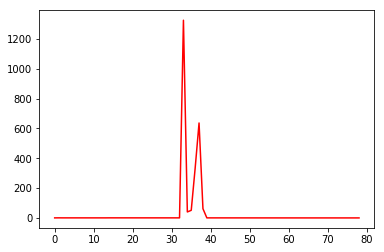

In [7]:
# 作图
#x1 = np.linspace(0, 1000,1000)
y1 = Fx1
#plt.plot(x1, y1, 'r-')
plt.plot(y1, 'r-')
plt.show()

In [ ]:
# 关闭仿真器
p.disconnect()

# 仿真3：约束空间运动（柔顺）

In [1]:
%matplotlib inline
import pybullet as p
import pybullet_data
import math
import time
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 阻抗控制器
class ImpedanceControl:
    def __init__(self):
        self.Md = 0
        self.Bd = 0
        self.Kd = 0
        self.Initialize()
    def Initialize(self):
        #set time variable
        import time
        self.currtm = time.time()
        self.prevtm = self.currtm
        NoT = 0  #number of cycle
    def SetMd(self,MdInput):
        self.Md = MdInput
    def SetBd(self,BdInput):
        self.Bd = BdInput
    def SetKd(self,KdInput):
        self.Kd = KdInput
    def GenOut(self,PPerror,Perror,Cerror,PPdeltaX,PdeltaX):
        Omega1 = 4*self.Md + 2*self.Bd*T + self.Kd*(T**2)
        Omega2 = -8*self.Md + 2*self.Kd*(T**2)
        Omega3 = 4*self.Md - 2*self.Bd*T + self.Kd*(T**2)
        if NoT == 1:
            return T**2 / Omega1 * Cerror
        elif NoT == 2:
            return T**2 / Omega1 * (Cerror + 2*Perror) - Omega2/Omega1*PdeltaX
        else:
            return T**2 / Omega1 *(Cerror + 2*Perror + PPerror) - (Omega2/Omega1)*PdeltaX - (Omega3/Omega1)*PPdeltaX

In [3]:
#创建实例
IC = ImpedanceControl()
#设置阻抗控制参数
IC.SetMd(0.01)    
IC.SetBd(0.01)  
IC.SetKd(1) 
# 阻抗控制器工作频率100Hz
T = 0.01
#Ke = 20    #stiffness of the environment

pperror,perror = 0,0
deltax,pdeltax,ppdeltax = 0,0,0

In [4]:
# 准备
physicsClient = p.connect(p.GUI)#or p.DIRECT for non-graphical version
p.setAdditionalSearchPath(pybullet_data.getDataPath()) #used by loadURDF
p.setGravity(0,0,-9.8)
planeId = p.loadURDF("plane.urdf")

In [5]:
#导入机器人
cubeStartPos1 = [0,0,0]
cubeStartOrientation1 = p.getQuaternionFromEuler([3*math.pi/2,0,0])
boxId = p.loadURDF("nachi/nachi.urdf",cubeStartPos1, cubeStartOrientation1,useFixedBase=True)

for i in range(1):
    p.stepSimulation()
InitialJointState = p.getJointState(boxId,jointIndex=5)  #（1）jointPosition （2）jointVelocity （3）jointReactionForces （4）appliedJointMotorTorque

#导入障碍物
cubeStartPos2 = [0.5,0,0]
#cubeStartOrientation2 = p.getQuaternionFromEuler([3*math.pi/2,0,math.pi])
cubeStartOrientation2 = p.getQuaternionFromEuler([3*math.pi/2,0,0])
boxId2 = p.loadURDF("nachi/nachi.urdf",cubeStartPos2, cubeStartOrientation2,useFixedBase=False)

In [6]:
#Joint damping coefficents. 
jd=[0.5,0.5,0.5,0.5,0.5,0.5,0.5]  #Using large values for the joints that we don't want to move. eg：jd=[100.0,100.0,100.0,100.0,100.0,100.0,0.5]

# 初始位姿
#pos = [0.1,0,0.5]
#InitialLinkState = p.getLinkState(boxId,5) 
#InitialLinkState = list(InitialLinkState)     # 元组转列表
#InitialLinkState[0] = list(InitialLinkState[0])   # 元组转列表
#orn = p.getQuaternionFromEuler([3.14,0,0])
orn = (0.0002783781085675267, 0.043552660059200485, -0.004722025404943391, 0.9990399345288813)
#安装力传感器
p.enableJointForceTorqueSensor(boxId,5)
# x方向力的记录
Fx1 = []
# 仿真
PostContactCount = 0
NoT = 0
Fd = 5  # 恒定为5N
p.setTimeStep(0.01)   #############
Trajectory=[]
while p.getLinkState(boxId,5)[0][0] <= 0.55: 
    InitialLinkState = p.getLinkState(boxId,5) 
    InitialLinkState = list(InitialLinkState)  # 元组转列表
    InitialLinkState[0] = list(InitialLinkState[0]) # 元组转列表
    if p.getLinkState(boxId,5)[0][2] >= 0.5:
        InitialLinkState[0][2] -= 0.01
    else:
        InitialLinkState[0][0] = InitialLinkState[0][0] + 0.01 - deltax

        
#    jointPoses = p.calculateInverseKinematics(boxId,5,InitialLinkState[0],orn,jointDamping=jd)
    jointPoses = p.calculateInverseKinematics(boxId,5,InitialLinkState[0],jointDamping=jd)
#    p.setJointMotorControlArray(boxId,[0,1,2,3,4,5],controlMode=p.POSITION_CONTROL, targetPositions=jointPoses,
#                                targetVelocities=[0,0,0,0,0,0],forces=[500,500,500,500,500,500],
#                               positionGains=[0.03,0.03,0.03,0.03,0.03,0.03],
#                               velocityGains=[1,1,1,1,1,1])
    p.setJointMotorControlArray(boxId,[0,1,2,3,4,5],controlMode=p.POSITION_CONTROL, targetPositions=jointPoses,
                                targetVelocities=[0,0,0,0,0,0])
    
    p.stepSimulation()   #check
    Trajectory.append(p.getLinkState(boxId,5)[0][0]) 
    
    J5EndState=p.getJointState(boxId,jointIndex=5)    # output: (1)jointPosition ; (2)jointVelocity ; (3)jointReactionForces (4)appliedJointMotorTorque
    Fx1.append(J5EndState[2][0])     #get F in x-axis
#    print(p.getContactPoints())
    ContactCount = len(p.getContactPoints())
    ContactCountIncre = ContactCount - PostContactCount

    if ContactCountIncre > 0:       #接触后便恒力跟踪
        error = J5EndState[2][0] - Fd  # + - ???
        deltax = IC.GenOut(PPerror=pperror,Perror=perror,Cerror=error,PPdeltaX=ppdeltax,PdeltaX=pdeltax)
        # prepare for next loop
        ppdeltax = pdeltax
        pdeltax = deltax
        pperror = perror
        perror = error   
    else:
        deltax = 0            
    PostContactCount = ContactCount    
   
    time.sleep(0.05)    
  
    
for i in range(100):
    p.stepSimulation()
    pos = [0.1,0,0.6]
  #  FinishPose = p.calculateInverseKinematics(boxId,5,pos,orn,jointDamping=jd)      
    FinishPose = p.calculateInverseKinematics(boxId,5,pos,jointDamping=jd)  
    p.setJointMotorControlArray(boxId,[0,1,2,3,4,5],controlMode=p.POSITION_CONTROL, targetPositions = FinishPose,
                                targetVelocities=[0,0,0,0,0,0],forces=[500,500,500,500,500,500],
                               positionGains=[0.03,0.03,0.03,0.03,0.03,0.03],
                               velocityGains=[1,1,1,1,1,1])   
    time.sleep(0.05)
print(len(p.getContactPoints()))   

4


4


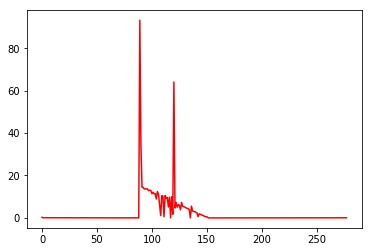

In [8]:
print(len(p.getContactPoints()))   
# 作图
#x1 = np.linspace(0, 1000,1000)



y1 = Trajectory
y1 = Fx1

#plt.plot(x1, y1, 'r-')
plt.plot(y1, 'r-')
plt.show()

In [ ]:
# 关闭仿真器
p.disconnect()